In [1]:
#importing the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [319]:
#reading the file
df=pd.read_csv(r"C:\Users\Apoorva\Downloads\Lead+Scoring+Case+Study (1)\Lead Scoring Assignment\Leads.csv")

In [320]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [321]:
#checking the shape of the dataset
df.shape

(9240, 37)

In [325]:
#getting info of the file
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

In [326]:
#There are many values as select. Replacing select with unknown
df=df.replace('Select','unknown')

In [327]:
#checking the percentage of missing values of all fields
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Lead Quality                                     51.590909
Asymmetrique Activity Index                      45.649351
Asymmetrique Profile Score                       45.649351
Asymmetrique Activity Score                      45.649351
Asymmetrique Profile Index                       45.649351
Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
Page Views Per Visit                              1.482684
TotalVisits                                       1.482684
Last Activity                                     1.114719
Lead Source                                       0.3896

In [331]:
#there are many columns which have missing values greater than 30%

In [332]:
# Only keeping columns with Null % below 40
missing_col=[]
for i in df.columns:
    if(df[i].isnull().sum()/df.shape[0]*100>40):
        missing_col.append(i)
print("columns which have missing values more than 40% are ")
print(missing_col)

columns which have missing values more than 40% are 
['Lead Quality', 'Asymmetrique Activity Index', 'Asymmetrique Profile Index', 'Asymmetrique Activity Score', 'Asymmetrique Profile Score']


In [335]:
#removing the columns with missing values more than 40%
for i in missing_col:
    df=df.drop(i, axis=1)

In [337]:
#checking the shape of dataset again to check if columns have been dropped
df.shape

(9240, 32)

In [339]:
#checking the null values again
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [340]:
#checking the number of missing values
df.isnull().sum()

Prospect ID                                         0
Lead Number                                         0
Lead Origin                                         0
Lead Source                                        36
Do Not Email                                        0
Do Not Call                                         0
Converted                                           0
TotalVisits                                       137
Total Time Spent on Website                         0
Page Views Per Visit                              137
Last Activity                                     103
Country                                          2461
Specialization                                   1438
How did you hear about X Education               2207
What is your current occupation                  2690
What matters most to you in choosing a course    2709
Search                                              0
Magazine                                            0
Newspaper Article           

In [343]:
#let us check the value counts for all the columns
for i in df.columns:
    print(df[i].value_counts())
#Below list shows the value_counts of all columns    

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [344]:
#checking the null values again
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Tags                                             36.287879
Lead Profile                                     29.318182
What matters most to you in choosing a course    29.318182
What is your current occupation                  29.112554
Country                                          26.634199
How did you hear about X Education               23.885281
Specialization                                   15.562771
City                                             15.367965
TotalVisits                                       1.482684
Page Views Per Visit                              1.482684
Last Activity                                     1.114719
Lead Source                                       0.389610
Receive More Updates About Our Courses            0.000000
Update me on Supply Chain Content                 0.000000
Prospect ID                                       0.000000
Digital Advertisement                             0.000000
Get updates on DM Content                         0.0000

In [347]:
#Taking the columns with missing values more than 5% and replacing missing values with unknown
missing_col=[]
for i in df.columns:
    if(df[i].isnull().sum()/df.shape[0]*100>5):
        missing_col.append(i)
print("columns which have missing values more than 5% are ")
print(missing_col)

columns which have missing values more than 5% are 
['Country', 'Specialization', 'How did you hear about X Education', 'What is your current occupation', 'What matters most to you in choosing a course', 'Tags', 'Lead Profile', 'City']


In [349]:
for i in missing_col:
    df.fillna("unknown",inplace=True)

C:\Users\Apoorva\AppData\Local\Temp\ipykernel_39016\452476271.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'unknown' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.fillna("unknown",inplace=True)


In [350]:
#checking the null values again
(df.isnull().sum()/df.shape[0]*100).sort_values(ascending=False)

Prospect ID                                      0.0
Lead Number                                      0.0
A free copy of Mastering The Interview           0.0
I agree to pay the amount through cheque         0.0
City                                             0.0
Lead Profile                                     0.0
Get updates on DM Content                        0.0
Update me on Supply Chain Content                0.0
Tags                                             0.0
Receive More Updates About Our Courses           0.0
Through Recommendations                          0.0
Digital Advertisement                            0.0
Newspaper                                        0.0
X Education Forums                               0.0
Newspaper Article                                0.0
Magazine                                         0.0
Search                                           0.0
What matters most to you in choosing a course    0.0
What is your current occupation               

In [353]:
#checking the number of missing values
df.isnull().sum()

Prospect ID                                      0
Lead Number                                      0
Lead Origin                                      0
Lead Source                                      0
Do Not Email                                     0
Do Not Call                                      0
Converted                                        0
TotalVisits                                      0
Total Time Spent on Website                      0
Page Views Per Visit                             0
Last Activity                                    0
Country                                          0
Specialization                                   0
How did you hear about X Education               0
What is your current occupation                  0
What matters most to you in choosing a course    0
Search                                           0
Magazine                                         0
Newspaper Article                                0
X Education Forums             

In [355]:
df.shape
#Now we can see that the data set is clean and there are no missing values

(9240, 32)

In [357]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,unknown,unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,unknown,unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,unknown,Mumbai,No,No,Modified


In [358]:
#Univariate analysis
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 32 columns):
 #   Column                                         Non-Null Count  Dtype 
---  ------                                         --------------  ----- 
 0   Prospect ID                                    9240 non-null   object
 1   Lead Number                                    9240 non-null   int64 
 2   Lead Origin                                    9240 non-null   object
 3   Lead Source                                    9240 non-null   object
 4   Do Not Email                                   9240 non-null   object
 5   Do Not Call                                    9240 non-null   object
 6   Converted                                      9240 non-null   int64 
 7   TotalVisits                                    9240 non-null   object
 8   Total Time Spent on Website                    9240 non-null   int64 
 9   Page Views Per Visit                           9240 non-null   

In [361]:
df.dtypes

Prospect ID                                      object
Lead Number                                       int64
Lead Origin                                      object
Lead Source                                      object
Do Not Email                                     object
Do Not Call                                      object
Converted                                         int64
TotalVisits                                      object
Total Time Spent on Website                       int64
Page Views Per Visit                             object
Last Activity                                    object
Country                                          object
Specialization                                   object
How did you hear about X Education               object
What is your current occupation                  object
What matters most to you in choosing a course    object
Search                                           object
Magazine                                        

In [363]:
#dividing the columns into categorical columns and numerical columns for univariate analysis
cat_cols=[]
num_cols=[]
for i in df.columns:
    if df[i].dtypes=='object':
        cat_cols.append(i)
for i in df.columns:
    if df[i].dtypes!='object':
        num_cols.append(i)

In [365]:
print(len(cat_cols))
print(len(num_cols))

29
3


In [367]:
#let us check the value counts for all the columns
for i in df.columns:
    print(df[i].value_counts())
#Below list shows the value_counts of all columns    

Prospect ID
7927b2df-8bba-4d29-b9a2-b6e0beafe620    1
22e9d4ef-d294-4ebf-81c7-7c7a1105aeea    1
46befc49-253a-419b-abea-2fd978d2e2b1    1
9d35a2c2-09d8-439f-9875-0e8bbf267f5a    1
f0de9371-4dc2-48c2-9785-a08d6fc4fcb5    1
                                       ..
ff1f7582-cb7b-4b94-9cdc-3d0d0afdd9a3    1
644099a2-3da4-4d23-9546-7676340a372b    1
2a093175-415b-4321-9e69-ed8d9df65a3c    1
c66249a3-8500-4c66-a511-312d914573de    1
571b5c8e-a5b2-4d57-8574-f2ffb06fdeff    1
Name: count, Length: 9240, dtype: int64
Lead Number
660737    1
603303    1
602561    1
602557    1
602540    1
         ..
630422    1
630405    1
630403    1
630390    1
579533    1
Name: count, Length: 9240, dtype: int64
Lead Origin
Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: count, dtype: int64
Lead Source
Google               2868
Direct Traffic       2543
Olark Chat           1755
Organic Search

In [368]:
#let us check some important columns for univariate analysis.
cols=['Lead Origin', 'Lead Source', 'Country','What is your current occupation','Tags','How did you hear about X Education']

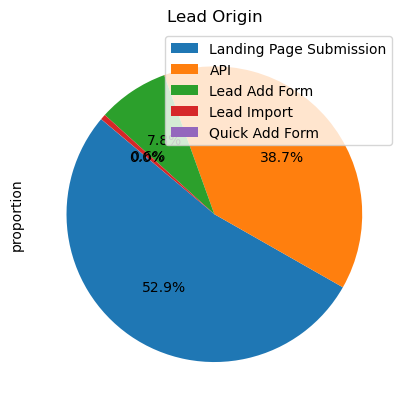

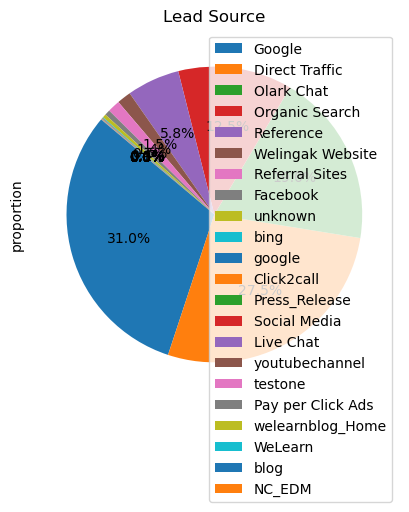

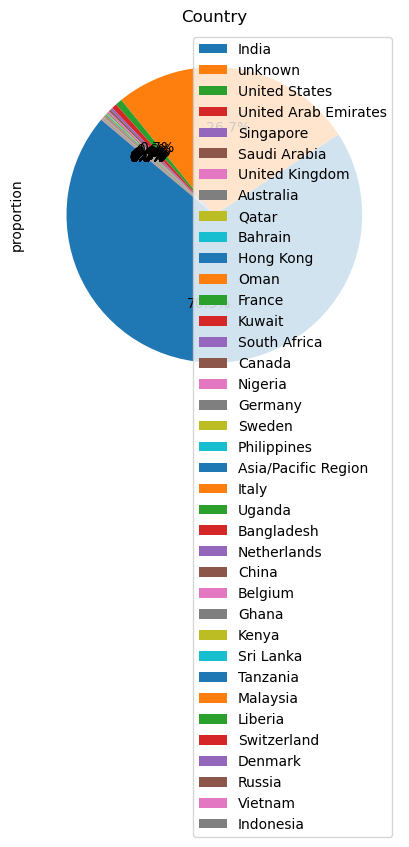

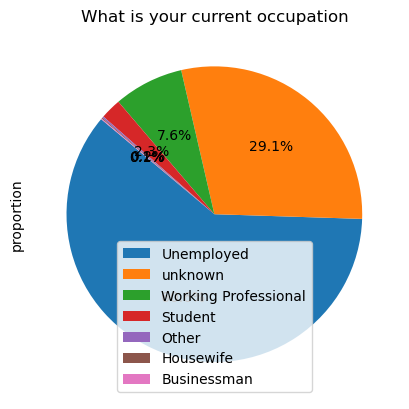

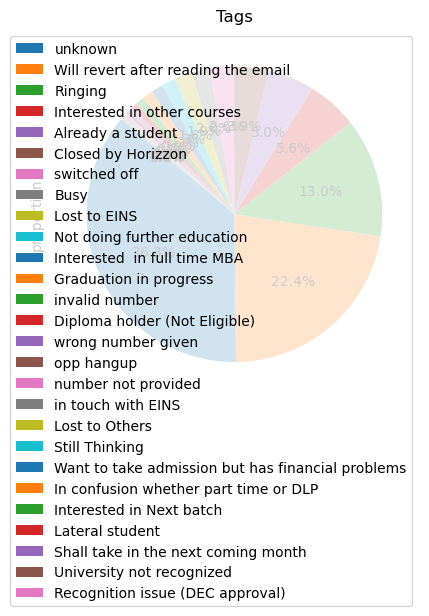

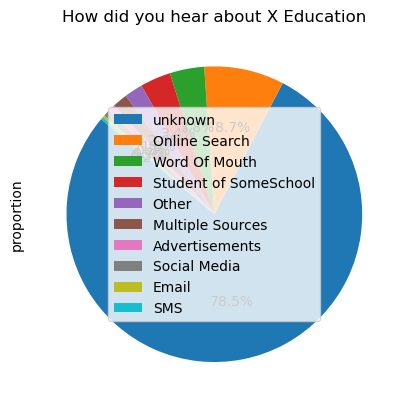

In [370]:
#Pie plot for univariate analysis
for i in cols:
    df[i].value_counts(normalize=True).plot.pie(labeldistance=None,autopct='%1.1f%%', startangle=140)
    plt.title(i)
    plt.legend()
    plt.show()

In [372]:
#Below are few conclusions we can see from above univariate analysis.
#Above 50% of the lead origin is fro, Landing page submission.
#Google contribute to the 31% of the lead source
#70% of the leads are from India.
#Most of the leads are unemployed
#Most of the leads tags are unknown
#Nearly 79% of the leads hgow did they hear about X education is unknown


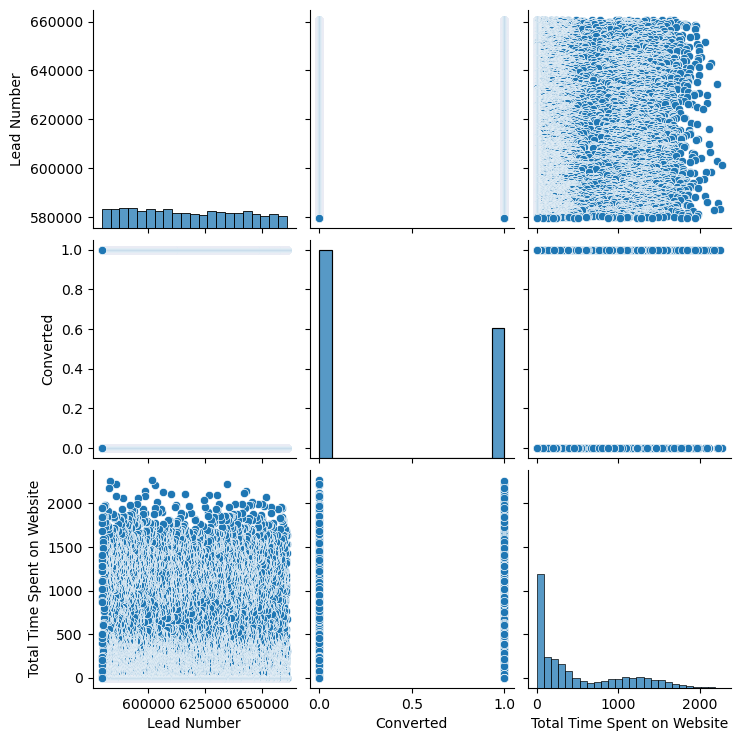

In [373]:
#pairplotting for the variables whereever necessary using seaborn
sns.pairplot(data=df,vars=num_cols)
plt.show()
#We can see the pair plots of the numerical columns

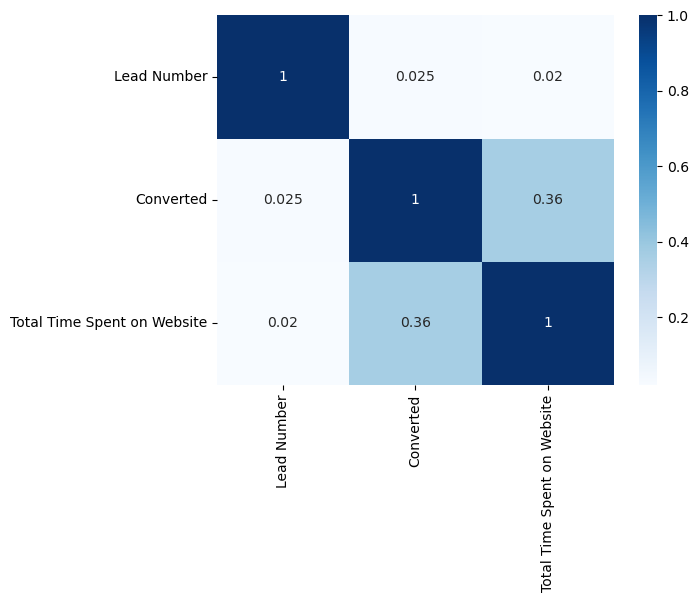

In [374]:
#Now for multi variate Analysis we can plot heatmap to get an idea about correlation among various variables
sns.heatmap(data=df[num_cols].corr(),cmap='Blues', annot=True)
plt.show()
#we can see the correlation matrix among different numerical columns

In [375]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,No,Interested in other courses,No,No,unknown,unknown,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,No,Ringing,No,No,unknown,unknown,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,No,Will revert after reading the email,No,No,Potential Lead,Mumbai,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,No,Ringing,No,No,unknown,Mumbai,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,No,Will revert after reading the email,No,No,unknown,Mumbai,No,No,Modified


In [376]:
#categorical to numerical conversion using label encoder
cat_cols=df.loc[:,df.dtypes=='object']
cat_cols.columns

Index(['Prospect ID', 'Lead Origin', 'Lead Source', 'Do Not Email',
       'Do Not Call', 'TotalVisits', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [377]:
#importing the sklearn library preprocessing
from sklearn import preprocessing
label_encoder=preprocessing.LabelEncoder()
for i in cat_cols:
    df[i] = df[i].astype(str)
    df[i]=label_encoder.fit_transform(df[i])


In [378]:
df.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,4427,660737,0,6,0,0,0,0,0,0,...,0,0,8,0,0,5,6,0,0,8
1,1554,660728,0,7,0,0,0,33,674,57,...,0,0,14,0,0,5,6,0,0,4
2,5140,660727,1,1,0,0,1,14,1532,43,...,0,0,19,0,0,3,0,0,1,4
3,467,660719,1,1,0,0,0,1,305,1,...,0,0,14,0,0,5,0,0,0,8
4,1874,660681,1,3,0,0,1,14,1428,1,...,0,0,19,0,0,5,0,0,0,8


In [379]:
df=df.drop(['Prospect ID','Lead Number'], axis=1)

In [380]:
x=df.drop(['Converted'], axis=1)
y=df['Converted']

In [381]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7,test_size=0.3, random_state=0)

In [382]:
x_cols=x_train.columns

In [383]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
x_train[x_cols]=scaler.fit_transform(x_train[x_cols])

In [386]:
x_train.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,...,Through Recommendations,Receive More Updates About Our Courses,Tags,Update me on Supply Chain Content,Get updates on DM Content,Lead Profile,City,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
6627,0.25,0.333333,0.0,0.0,0.341463,0.490901,0.377193,0.705882,0.324324,0.666667,...,0.0,0.0,0.730769,0.0,0.0,0.6,0.500000,0.0,0.0,0.800000
4953,0.25,0.142857,0.0,0.0,0.804878,0.089214,0.833333,0.705882,0.324324,0.944444,...,0.0,0.0,0.961538,0.0,0.0,1.0,0.666667,0.0,1.0,0.533333
5111,0.00,0.047619,0.0,0.0,0.707317,0.108300,0.771930,0.294118,0.324324,1.000000,...,0.0,0.0,0.538462,0.0,0.0,1.0,1.000000,0.0,0.0,0.266667
1906,0.00,0.142857,0.0,0.0,0.341463,0.625832,0.008772,0.294118,0.324324,0.555556,...,0.0,0.0,0.153846,0.0,0.0,0.4,1.000000,0.0,0.0,0.533333
4917,0.00,0.285714,0.0,0.0,0.000000,0.000000,0.000000,0.529412,1.000000,1.000000,...,0.0,0.0,0.961538,0.0,0.0,1.0,1.000000,0.0,0.0,0.600000


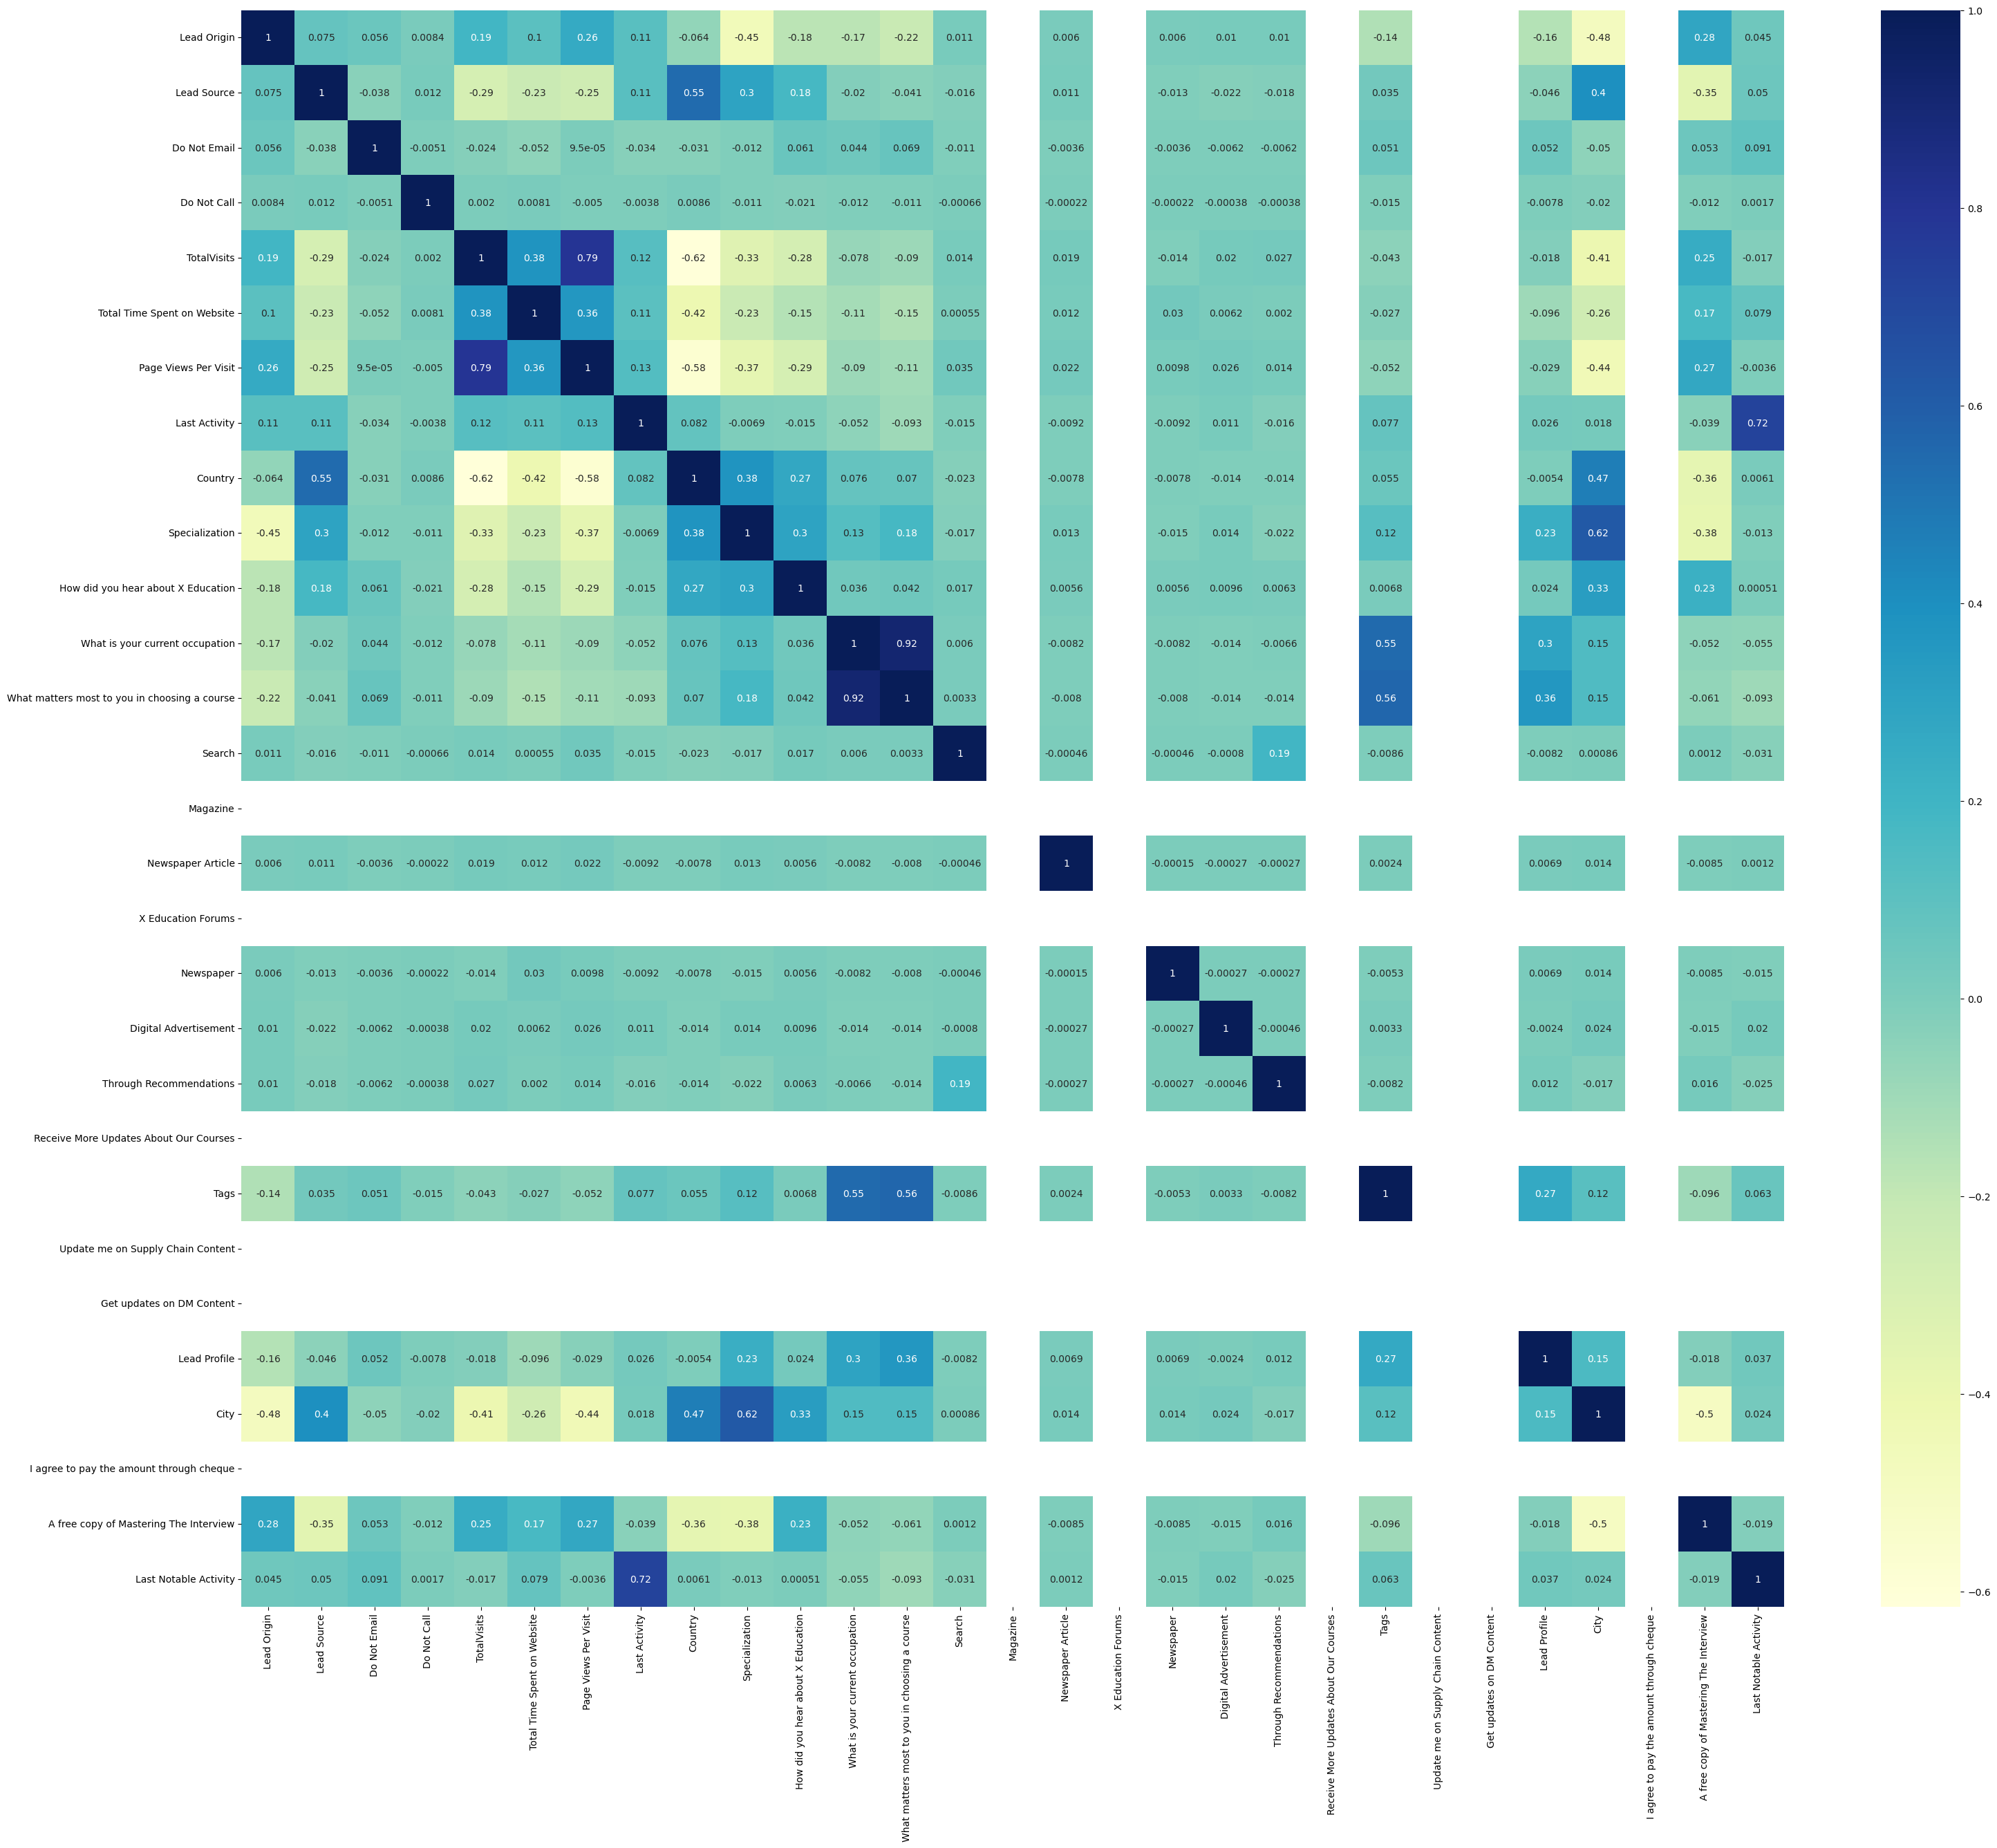

In [387]:
#heatmap for x_train to know the correlation
plt.figure(figsize = (36, 30))
sns.heatmap(x_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [388]:
#We can see that there is very high correlation between last activity and last notable activity
#city and specialization also have high correlation, tags and what matters most to you in choosing a course also have high correlation

In [389]:
#use rfe to select 15 features to build logistic regression model 
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
lg1=LogisticRegression()

In [391]:
rfe=RFE(lg1,n_features_to_select=15)
rfe=rfe.fit(x_train,y_train)

In [395]:
list(zip(x_train.columns,rfe.support_,rfe.ranking_))

[('Lead Origin', True, 1),
 ('Lead Source', True, 1),
 ('Do Not Email', True, 1),
 ('Do Not Call', False, 4),
 ('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Last Activity', True, 1),
 ('Country', True, 1),
 ('Specialization', True, 1),
 ('How did you hear about X Education', False, 7),
 ('What is your current occupation', True, 1),
 ('What matters most to you in choosing a course', True, 1),
 ('Search', True, 1),
 ('Magazine', False, 15),
 ('Newspaper Article', False, 5),
 ('X Education Forums', False, 11),
 ('Newspaper', False, 2),
 ('Digital Advertisement', False, 6),
 ('Through Recommendations', True, 1),
 ('Receive More Updates About Our Courses', False, 14),
 ('Tags', True, 1),
 ('Update me on Supply Chain Content', False, 10),
 ('Get updates on DM Content', False, 12),
 ('Lead Profile', True, 1),
 ('City', False, 9),
 ('I agree to pay the amount through cheque', False, 13),
 ('A free copy of Mastering The Interview', 

In [403]:
cols=x_train.columns[rfe.support_]

In [405]:
#creating a function which can be used again and again
def get_lgr(cols):
    X_train_sm=sm.add_constant(x_train[cols])
    lg=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
    res=lg.fit()
    return(res)

In [406]:
#creating function to return VIF value
from statsmodels.stats.outliers_influence import variance_inflation_factor
import statsmodels.api as sm
def get_VIF(cols):
    vif = pd.DataFrame()
    X=x_train[cols]
    vif['Features'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return(vif)

In [407]:
#Let us take the threshold as 0.5 as of now
def pred(x):
    if x>0.5:
        return 1
    else:
        return 0

In [408]:
#Now let us create a function to give a table with predicted probabilities 
def y_train_pred_fun(res):
    y_train_pred=res.predict(X_train_sm)
    y_train_pred_final=pd.DataFrame({'lead':y_train.values,'lead_convert_prob_predicted':y_train_pred})
    y_train_pred_final["LEAD_ID"]=y_train.index
    y_train_pred_final['predicted_prob']=y_train_pred_final['lead_convert_prob_predicted'].apply(pred)
    return y_train_pred_final

In [409]:
#Now let us create a function for the metrics f1_score,accuracy,precision,recall,
from sklearn import metrics
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
def metrics_calc(y_train_pred_final):
    confusion= metrics.confusion_matrix(y_train_pred_final['lead'],y_train_pred_final['predicted_prob'])
    accuracy = accuracy_score(y_train_pred_final['lead'], y_train_pred_final['predicted_prob'])
    recall= recall_score(y_train_pred_final['lead'], y_train_pred_final['predicted_prob'])
    precision=precision_score(y_train_pred_final['lead'], y_train_pred_final['predicted_prob'])
    f1=f1_score(y_train_pred_final['lead'], y_train_pred_final['predicted_prob'])
    return ( 'accuracy: ' + str(accuracy), 'recall: ' + str(recall), 'precision: ' + str(precision), 'f1: ' + str(f1) )

In [410]:
#now let us again freshly start buliding model as we have created functions for all operations for repeated use
#cols have the 15 columns supported by RFE

In [411]:
#logistic regression model 
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6452
Model Family:                Binomial   Df Model:                           15
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2698.5
Date:                Thu, 23 Jan 2025   Deviance:                       5396.9
Time:                        14:16:35   Pearson chi2:                 7.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3909
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.7888      0.469    -12.336      0.000      -6.709      -4.869
Lead Origin                                       1.5662      0.255      6.139      0.000       1.066       2.066
Lead Source                                       2.8545      0.281     10.171      0.000       2.304       3.405
Do Not Email                                     -1.6044      0.165     -9.741      0.000      -1.927      -1.282
Total Time Spent on Website                       4.6149      0.168     27.408      0.000       4.285       4.945
Page Views Per Visit                             -0.8794      0.144     -6.089      0.000      -1.162      -0.596
Last Activity                                     1.4766      0.256      5.760      0.000       0.974       1.979
Country                                           1.2186      0.174      7.021      0.000       0.878       1.559
Specialization                                   -0.5821      0.126     -4.608      0.000      -0.830      -0.335
What is your current occupation                   5.0134      0.615      8.153      0.000       3.808       6.219
What matters most to you in choosing a course    -3.8035      0.224    -16.957      0.000      -4.243      -3.364
Search                                            0.9542      0.818      1.166      0.244      -0.649       2.558
Through Recommendations                           1.6333      1.350      1.210      0.226      -1.013       4.279
Tags                                              2.2447      0.136     16.547      0.000       1.979       2.511
Lead Profile                                     -2.2940      0.181    -12.655      0.000      -2.649      -1.939
Last Notable Activity                             1.0120      0.255      3.965      0.000       0.512       1.512
=================================================================================================================
"""

In [415]:
#calculating VIf
get_VIF(cols)

,Features,VIF
8,What is your current occupation,45.43
13,Lead Profile,21.96
14,Last Notable Activity,15.86
5,Last Activity,12.77
6,Country,8.74
12,Tags,8.65
7,Specialization,7.11
4,Page Views Per Visit,4.40
1,Lead Source,4.37
9,What matters most to you in choosing a course,3.94


In [427]:
#from above we can see that Through Recommendations column is not significant so we can drop it
cols=cols.drop('Through Recommendations')
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Tags',
       'Lead Profile', 'Last Notable Activity'],
      dtype='object')

In [429]:
#again running the model without Through Recommendations
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6453
Model Family:                Binomial   Df Model:                           14
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2699.2
Date:                Thu, 23 Jan 2025   Deviance:                       5398.5
Time:                        14:16:37   Pearson chi2:                 7.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3907
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.7981      0.470    -12.347      0.000      -6.719      -4.878
Lead Origin                                       1.5665      0.255      6.141      0.000       1.067       2.066
Lead Source                                       2.8497      0.281     10.156      0.000       2.300       3.400
Do Not Email                                     -1.6044      0.165     -9.743      0.000      -1.927      -1.282
Total Time Spent on Website                       4.6125      0.168     27.404      0.000       4.283       4.942
Page Views Per Visit                             -0.8799      0.144     -6.095      0.000      -1.163      -0.597
Last Activity                                     1.4770      0.256      5.763      0.000       0.975       1.979
Country                                           1.2183      0.174      7.021      0.000       0.878       1.558
Specialization                                   -0.5848      0.126     -4.631      0.000      -0.832      -0.337
What is your current occupation                   5.0301      0.616      8.172      0.000       3.824       6.237
What matters most to you in choosing a course    -3.8110      0.224    -16.979      0.000      -4.251      -3.371
Search                                            1.1922      0.799      1.492      0.136      -0.374       2.759
Tags                                              2.2441      0.136     16.546      0.000       1.978       2.510
Lead Profile                                     -2.2868      0.181    -12.625      0.000      -2.642      -1.932
Last Notable Activity                             1.0057      0.255      3.941      0.000       0.506       1.506
=================================================================================================================
"""

In [431]:
#calculating VIf
get_VIF(cols)

,Features,VIF
8,What is your current occupation,45.43
12,Lead Profile,21.94
13,Last Notable Activity,15.85
5,Last Activity,12.77
6,Country,8.74
11,Tags,8.65
7,Specialization,7.11
4,Page Views Per Visit,4.40
1,Lead Source,4.37
9,What matters most to you in choosing a course,3.94


In [433]:
#dropping Search column as it is not significant
cols=cols.drop('Search')

In [435]:
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [437]:
#building 3rd model by dropping Search
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6454
Model Family:                Binomial   Df Model:                           13
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2700.3
Date:                Thu, 23 Jan 2025   Deviance:                       5400.6
Time:                        14:16:39   Pearson chi2:                 7.18e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3905
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -5.7963      0.470    -12.342      0.000      -6.717      -4.876
Lead Origin                                       1.5648      0.255      6.136      0.000       1.065       2.065
Lead Source                                       2.8507      0.280     10.163      0.000       2.301       3.400
Do Not Email                                     -1.6050      0.165     -9.750      0.000      -1.928      -1.282
Total Time Spent on Website                       4.6083      0.168     27.391      0.000       4.279       4.938
Page Views Per Visit                             -0.8749      0.144     -6.064      0.000      -1.158      -0.592
Last Activity                                     1.4796      0.256      5.774      0.000       0.977       1.982
Country                                           1.2159      0.173      7.009      0.000       0.876       1.556
Specialization                                   -0.5866      0.126     -4.647      0.000      -0.834      -0.339
What is your current occupation                   5.0422      0.616      8.191      0.000       3.836       6.249
What matters most to you in choosing a course    -3.8119      0.224    -16.985      0.000      -4.252      -3.372
Tags                                              2.2406      0.136     16.531      0.000       1.975       2.506
Lead Profile                                     -2.2879      0.181    -12.631      0.000      -2.643      -1.933
Last Notable Activity                             0.9962      0.255      3.906      0.000       0.496       1.496
=================================================================================================================
"""

In [439]:
#calculating VIf
get_VIF(cols)

,Features,VIF
8,What is your current occupation,45.40
11,Lead Profile,21.94
12,Last Notable Activity,15.84
5,Last Activity,12.77
6,Country,8.74
10,Tags,8.65
7,Specialization,7.11
4,Page Views Per Visit,4.39
1,Lead Source,4.37
9,What matters most to you in choosing a course,3.94


In [441]:
#Now we can see that all the columns are significant. VIF is very large for few of the columns so we can remove them to decrease VIF. Removing What is your current occupation
cols=cols.drop('What is your current occupation')
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags', 'Lead Profile',
       'Last Notable Activity'],
      dtype='object')

In [443]:
#building 4th Model without 'What is your current occupation' column
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6455
Model Family:                Binomial   Df Model:                           12
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2737.8
Date:                Thu, 23 Jan 2025   Deviance:                       5475.6
Time:                        14:16:44   Pearson chi2:                 7.17e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3834
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -2.4226      0.220    -11.029      0.000      -2.853      -1.992
Lead Origin                                       1.6494      0.253      6.528      0.000       1.154       2.145
Lead Source                                       2.8500      0.279     10.221      0.000       2.304       3.396
Do Not Email                                     -1.6332      0.163    -10.001      0.000      -1.953      -1.313
Total Time Spent on Website                       4.6123      0.167     27.620      0.000       4.285       4.940
Page Views Per Visit                             -0.8709      0.143     -6.092      0.000      -1.151      -0.591
Last Activity                                     1.4505      0.254      5.710      0.000       0.953       1.948
Country                                           1.2306      0.173      7.129      0.000       0.892       1.569
Specialization                                   -0.6273      0.125     -5.023      0.000      -0.872      -0.383
What matters most to you in choosing a course    -2.1877      0.101    -21.754      0.000      -2.385      -1.991
Tags                                              2.3138      0.134     17.267      0.000       2.051       2.576
Lead Profile                                     -2.3465      0.179    -13.120      0.000      -2.697      -1.996
Last Notable Activity                             1.0949      0.253      4.329      0.000       0.599       1.591
=================================================================================================================
"""

In [445]:
#calculating VIf
get_VIF(cols)

,Features,VIF
10,Lead Profile,16.10
11,Last Notable Activity,14.68
5,Last Activity,12.57
9,Tags,8.22
6,Country,7.64
7,Specialization,6.96
1,Lead Source,4.37
4,Page Views Per Visit,3.95
0,Lead Origin,3.05
8,What matters most to you in choosing a course,2.34


In [447]:
#Removing Lead Profile
cols=cols.drop('Lead Profile')
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags',
       'Last Notable Activity'],
      dtype='object')

In [449]:
#building 5th Model without 'Lead Profile' column
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6456
Model Family:                Binomial   Df Model:                           11
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2828.3
Date:                Thu, 23 Jan 2025   Deviance:                       5656.5
Time:                        14:17:01   Pearson chi2:                 6.97e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3659
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -4.0040      0.188    -21.348      0.000      -4.372      -3.636
Lead Origin                                       1.5995      0.248      6.451      0.000       1.114       2.085
Lead Source                                       3.0206      0.275     10.988      0.000       2.482       3.559
Do Not Email                                     -1.6371      0.162    -10.115      0.000      -1.954      -1.320
Total Time Spent on Website                       4.6375      0.165     28.178      0.000       4.315       4.960
Page Views Per Visit                             -0.9193      0.140     -6.547      0.000      -1.195      -0.644
Last Activity                                     1.3009      0.250      5.209      0.000       0.811       1.790
Country                                           1.3232      0.169      7.814      0.000       0.991       1.655
Specialization                                   -0.9417      0.121     -7.809      0.000      -1.178      -0.705
What matters most to you in choosing a course    -2.4501      0.098    -24.895      0.000      -2.643      -2.257
Tags                                              2.0872      0.129     16.166      0.000       1.834       2.340
Last Notable Activity                             0.9740      0.248      3.930      0.000       0.488       1.460
=================================================================================================================
"""

In [451]:
#calculating VIf
get_VIF(cols)

,Features,VIF
10,Last Notable Activity,13.53
5,Last Activity,12.46
9,Tags,7.64
6,Country,7.21
7,Specialization,5.68
1,Lead Source,4.33
4,Page Views Per Visit,3.47
0,Lead Origin,2.93
8,What matters most to you in choosing a course,2.27
3,Total Time Spent on Website,2.19


In [453]:
#Removing Last Notable Activity
cols=cols.drop('Last Notable Activity')
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags'],
      dtype='object')

In [455]:
#building 6th Model without 'Last Notable Activity' column
get_lgr(cols).summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.9
Date:                Thu, 23 Jan 2025   Deviance:                       5671.9
Time:                        14:17:16   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7592      0.177    -21.296      0.000      -4.105      -3.413
Lead Origin                                       1.5744      0.248      6.354      0.000       1.089       2.060
Lead Source                                       3.0171      0.275     10.978      0.000       2.478       3.556
Do Not Email                                     -1.5747      0.161     -9.779      0.000      -1.890      -1.259
Total Time Spent on Website                       4.6229      0.164     28.147      0.000       4.301       4.945
Page Views Per Visit                             -1.0146      0.139     -7.310      0.000      -1.287      -0.743
Last Activity                                     2.0718      0.159     12.993      0.000       1.759       2.384
Country                                           1.2298      0.168      7.335      0.000       0.901       1.558
Specialization                                   -0.9536      0.120     -7.918      0.000      -1.190      -0.718
What matters most to you in choosing a course    -2.4655      0.098    -25.113      0.000      -2.658      -2.273
Tags                                              2.0868      0.129     16.175      0.000       1.834       2.340
=================================================================================================================
"""

In [457]:
#calculating VIf
get_VIF(cols)

,Features,VIF
9,Tags,7.37
6,Country,7.21
5,Last Activity,5.64
7,Specialization,5.52
1,Lead Source,4.33
4,Page Views Per Visit,3.46
0,Lead Origin,2.91
8,What matters most to you in choosing a course,2.25
3,Total Time Spent on Website,2.17
2,Do Not Email,1.10


In [459]:
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags'],
      dtype='object')

6th model is the final one with cols as ['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags']

In [462]:
#Now let us check for the y_predicted one on the training set using function
X_train_sm=sm.add_constant(x_train[cols])
lg=sm.GLM(y_train,X_train_sm, family=sm.families.Binomial())
res=lg.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6468
Model:                            GLM   Df Residuals:                     6457
Model Family:                Binomial   Df Model:                           10
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2835.9
Date:                Thu, 23 Jan 2025   Deviance:                       5671.9
Time:                        14:17:34   Pearson chi2:                 7.02e+03
No. Iterations:                     6   Pseudo R-squ. (CS):             0.3644
Covariance Type:            nonrobust                                         
=================================================================================================================
                                                    coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------
const                                            -3.7592      0.177    -21.296      0.000      -4.105      -3.413
Lead Origin                                       1.5744      0.248      6.354      0.000       1.089       2.060
Lead Source                                       3.0171      0.275     10.978      0.000       2.478       3.556
Do Not Email                                     -1.5747      0.161     -9.779      0.000      -1.890      -1.259
Total Time Spent on Website                       4.6229      0.164     28.147      0.000       4.301       4.945
Page Views Per Visit                             -1.0146      0.139     -7.310      0.000      -1.287      -0.743
Last Activity                                     2.0718      0.159     12.993      0.000       1.759       2.384
Country                                           1.2298      0.168      7.335      0.000       0.901       1.558
Specialization                                   -0.9536      0.120     -7.918      0.000      -1.190      -0.718
What matters most to you in choosing a course    -2.4655      0.098    -25.113      0.000      -2.658      -2.273
Tags                                              2.0868      0.129     16.175      0.000       1.834       2.340
=================================================================================================================
"""

In [464]:
#let us call the function for the y_predicted dataframe
y_train_pred_final=y_train_pred_fun(res)

In [466]:
#the predicted values in a dataframe
y_train_pred_final

,lead,lead_convert_prob_predicted,LEAD_ID,predicted_prob
6627,1,0.906972,6627,1
4953,0,0.053856,4953,0
5111,0,0.061811,5111,0
1906,0,0.587946,1906,1
4917,0,0.120969,4917,0
...,...,...,...,...
7891,1,0.530045,7891,1
9225,0,0.087630,9225,0
4859,0,0.259494,4859,0
3264,0,0.120969,3264,0


In [468]:
#let is call the function for calculating the metrics
metrics_calc(y_train_pred_final)

('accuracy: 0.8010204081632653',
 'recall: 0.687980574666127',
 'precision: 0.7671480144404332',
 'f1: 0.7254107104757841')

In [470]:
# Let's take a look at the confusion matrix
confusion = metrics.confusion_matrix(y_train_pred_final.lead, y_train_pred_final.predicted_prob )
confusion

array([[3481,  516],
       [ 771, 1700]], dtype=int64)

In [472]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [473]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.687980574666127

In [476]:
# Let us calculate specificity
TN / float(TN+FP)

0.8709031773830372

In [477]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.12909682261696273


In [478]:
# positive predictive value 
print (TP / float(TP+FP))

0.7671480144404332


In [479]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8186735653809972


In [484]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [486]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.lead, y_train_pred_final.lead_convert_prob_predicted, drop_intermediate = False )

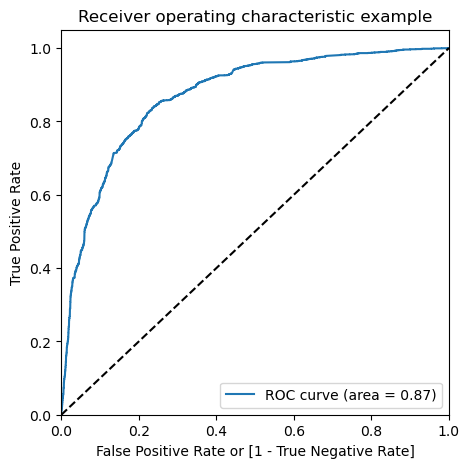

In [488]:
draw_roc(y_train_pred_final.lead, y_train_pred_final.lead_convert_prob_predicted)

In [490]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.lead_convert_prob_predicted.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,lead,lead_convert_prob_predicted,LEAD_ID,predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
6627,1,0.906972,6627,1,1,1,1,1,1,1,1,1,1,1
4953,0,0.053856,4953,0,1,0,0,0,0,0,0,0,0,0
5111,0,0.061811,5111,0,1,0,0,0,0,0,0,0,0,0
1906,0,0.587946,1906,1,1,1,1,1,1,1,0,0,0,0
4917,0,0.120969,4917,0,1,1,0,0,0,0,0,0,0,0


In [492]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.lead, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.382035  1.000000  0.000000
0.1   0.1  0.596011  0.969243  0.365274
0.2   0.2  0.731293  0.915824  0.617213
0.3   0.3  0.784787  0.855929  0.740806
0.4   0.4  0.794527  0.776204  0.805854
0.5   0.5  0.801020  0.687981  0.870903
0.6   0.6  0.783086  0.588426  0.903428
0.7   0.7  0.769017  0.491299  0.940706
0.8   0.8  0.736858  0.356536  0.971979
0.9   0.9  0.673315  0.165925  0.986990


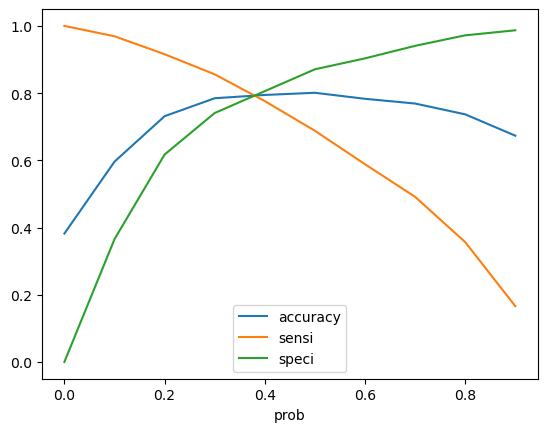

In [494]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.show()

In [496]:
#All the curves intersect at 0.4. So 0.4 is the best suited cutoff
y_train_pred_final['final_predicted'] = y_train_pred_final.lead_convert_prob_predicted.map( lambda x: 1 if x > 0.4 else 0)

y_train_pred_final.head()

,lead,lead_convert_prob_predicted,LEAD_ID,predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6627,1,0.906972,6627,1,1,1,1,1,1,1,1,1,1,1,1
4953,0,0.053856,4953,0,1,0,0,0,0,0,0,0,0,0,0
5111,0,0.061811,5111,0,1,0,0,0,0,0,0,0,0,0,0
1906,0,0.587946,1906,1,1,1,1,1,1,1,0,0,0,0,1
4917,0,0.120969,4917,0,1,1,0,0,0,0,0,0,0,0,0


In [498]:
#Now let us calculate metrics with the new probablities
confusion= metrics.confusion_matrix(y_train_pred_final['lead'],y_train_pred_final['final_predicted'])
accuracy = accuracy_score(y_train_pred_final['lead'], y_train_pred_final['final_predicted'])
recall= recall_score(y_train_pred_final['lead'], y_train_pred_final['final_predicted'])
precision=precision_score(y_train_pred_final['lead'], y_train_pred_final['final_predicted'])
f1=f1_score(y_train_pred_final['lead'], y_train_pred_final['final_predicted'])

In [500]:
print('accuracy: ' + str(accuracy), 'recall: ' + str(recall), 'precision: ' + str(precision), 'f1: ' + str(f1))

accuracy: 0.7945269016697588 recall: 0.7762039660056658 precision: 0.7119524870081663 f1: 0.7426911907066795


In [502]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [504]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7762039660056658

In [505]:
# Let us calculate specificity
TN / float(TN+FP)

0.8058543907930948

In [508]:
# Calculate false postive rate - predicting churn when customer does not have churned
print(FP/ float(TN+FP))

0.19414560920690518


In [509]:
# Positive predictive value 
print (TP / float(TP+FP))

0.7119524870081663


In [512]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8534711181770005


In [514]:
#Precision and recall trade off
from sklearn.metrics import precision_recall_curve

In [516]:
y_train_pred_final.lead, y_train_pred_final.final_predicted

(6627    1
 4953    0
 5111    0
 1906    0
 4917    0
        ..
 7891    1
 9225    0
 4859    0
 3264    0
 2732    0
 Name: lead, Length: 6468, dtype: int64,
 6627    1
 4953    0
 5111    0
 1906    1
 4917    0
        ..
 7891    1
 9225    0
 4859    0
 3264    0
 2732    0
 Name: final_predicted, Length: 6468, dtype: int64)

In [518]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.lead, y_train_pred_final.lead_convert_prob_predicted)

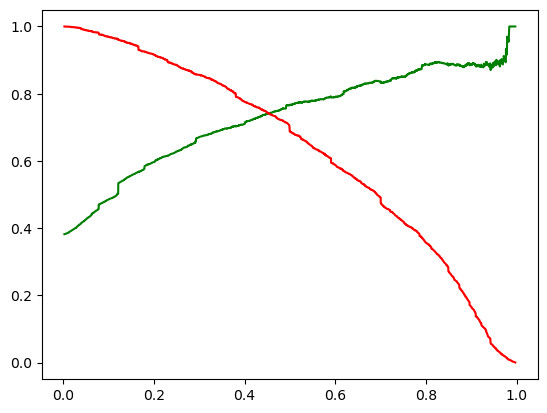

In [520]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

In [522]:
#cols are the columns which are used in the model.Now let us test the model using test dataset
cols

Index(['Lead Origin', 'Lead Source', 'Do Not Email',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization',
       'What matters most to you in choosing a course', 'Tags'],
      dtype='object')

In [257]:
x_test.columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [524]:
x_test[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']]=scaler.transform(x_test[['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Last Activity', 'Country', 'Specialization',
       'How did you hear about X Education', 'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity']])

In [526]:
x_test[cols]

,Lead Origin,Lead Source,Do Not Email,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What matters most to you in choosing a course,Tags
2212,0.00,0.142857,0.0,0.487794,0.377193,0.588235,0.324324,1.000000,0.0,0.923077
3034,0.50,0.476190,0.0,0.553484,0.008772,0.176471,1.000000,1.000000,0.0,0.384615
4492,0.00,0.285714,0.0,0.087883,0.008772,0.529412,1.000000,1.000000,0.0,0.961538
5063,0.25,0.333333,1.0,0.108744,0.500000,0.705882,0.324324,0.388889,0.0,0.923077
7645,0.00,0.285714,0.0,0.000000,0.000000,0.529412,1.000000,1.000000,1.0,0.961538
...,...,...,...,...,...,...,...,...,...,...
7966,0.50,0.476190,0.0,0.000000,0.000000,0.294118,1.000000,1.000000,0.0,0.076923
9071,0.00,0.285714,0.0,0.000000,0.000000,0.529412,1.000000,1.000000,1.0,0.961538
6208,0.00,0.047619,0.0,0.264536,0.377193,0.294118,0.324324,1.000000,0.0,0.538462
6589,0.25,0.142857,0.0,0.078562,0.833333,0.588235,0.324324,0.388889,0.0,0.230769


In [528]:
X_test=x_test[cols]

In [530]:
X_test_sm = sm.add_constant(X_test)

In [532]:
y_test_pred = res.predict(X_test_sm)

In [534]:
y_test_pred[:10]

2212    0.756623
3034    0.921204
4492    0.706744
5063    0.372250
7645    0.120969
4658    0.920060
7481    0.062123
2608    0.189946
3706    0.144852
5626    0.560159
dtype: float64

In [536]:
# Converting y_pred to a dataframe which is an array
y_pred_1 = pd.DataFrame(y_test_pred)

In [538]:
# Let's see the head
y_pred_1.head()

,0
2212,0.756623
3034,0.921204
4492,0.706744
5063,0.372250
7645,0.120969


In [540]:
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)

In [542]:
# Putting LEAD_ID to index
y_test_df['LEAD_ID'] = y_test_df.index

In [544]:
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [546]:
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test_df, y_pred_1],axis=1)

In [548]:
y_pred_final.head()

,Converted,LEAD_ID,0
0,0,2212,0.756623
1,1,3034,0.921204
2,0,4492,0.706744
3,0,5063,0.372250
4,0,7645,0.120969


In [550]:
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 0 : 'Convert_Prob'})

In [552]:
# Rearranging the columns
y_pred_final = y_pred_final.reindex(['LEAD_ID','Converted','Convert_Prob'], axis=1)

In [554]:
# Let's see the head of y_pred_final
y_pred_final.head()

,LEAD_ID,Converted,Convert_Prob
0,2212,0,0.756623
1,3034,1,0.921204
2,4492,0,0.706744
3,5063,0,0.372250
4,7645,0,0.120969


In [556]:
y_pred_final['final_predicted'] = y_pred_final.Convert_Prob.map(lambda x: 1 if x > 0.4 else 0)

In [558]:
y_test_pred_final=y_pred_final

In [560]:
y_test_pred_final

,LEAD_ID,Converted,Convert_Prob,final_predicted
0,2212,0,0.756623,1
1,3034,1,0.921204,1
2,4492,0,0.706744,1
3,5063,0,0.372250,0
4,7645,0,0.120969,0
...,...,...,...,...
2767,7966,1,0.380050,0
2768,9071,0,0.120969,0
2769,6208,0,0.168384,0
2770,6589,0,0.155951,0


In [562]:
# Let's check the overall accuracy.
metrics.accuracy_score(y_pred_final.Converted, y_pred_final.final_predicted)

0.7904040404040404

In [564]:
confusion2 = metrics.confusion_matrix(y_pred_final.Converted, y_pred_final.final_predicted )
confusion2

array([[1361,  321],
       [ 260,  830]], dtype=int64)

In [566]:
recall= recall_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
precision=precision_score(y_pred_final['Converted'], y_pred_final['final_predicted'])
f1=f1_score(y_pred_final['Converted'], y_pred_final['final_predicted'])

In [568]:
print('recall:', recall)

recall: 0.7614678899082569


In [570]:
print('precision:', precision)


precision: 0.7211120764552563


In [1149]:
print('f1_score:', f1)

f1_score: 0.7558139534883721


In [572]:
TP = confusion2[1,1] # true positive 
TN = confusion2[0,0] # true negatives
FP = confusion2[0,1] # false positives
FN = confusion2[1,0] # false negatives

In [574]:
# Let's see the sensitivity of our logistic regression model
TP / float(TP+FN)

0.7614678899082569

In [576]:
# Let us calculate specificity
TN / float(TN+FP)

0.8091557669441142

In [578]:
#Now we have to generate lead score by combining train and test data
y_train_pred_df = y_train_pred_final[['LEAD_ID', 'lead_convert_prob_predicted']]
y_test_pred_df = y_test_pred_final[['LEAD_ID', 'Convert_Prob']]

In [580]:
y_train_pred_final

,lead,lead_convert_prob_predicted,LEAD_ID,predicted_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
6627,1,0.906972,6627,1,1,1,1,1,1,1,1,1,1,1,1
4953,0,0.053856,4953,0,1,0,0,0,0,0,0,0,0,0,0
5111,0,0.061811,5111,0,1,0,0,0,0,0,0,0,0,0,0
1906,0,0.587946,1906,1,1,1,1,1,1,1,0,0,0,0,1
4917,0,0.120969,4917,0,1,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7891,1,0.530045,7891,1,1,1,1,1,1,1,0,0,0,0,1
9225,0,0.087630,9225,0,1,0,0,0,0,0,0,0,0,0,0
4859,0,0.259494,4859,0,1,1,1,0,0,0,0,0,0,0,0
3264,0,0.120969,3264,0,1,1,0,0,0,0,0,0,0,0,0


In [582]:
y_test_pred_final

,LEAD_ID,Converted,Convert_Prob,final_predicted
0,2212,0,0.756623,1
1,3034,1,0.921204,1
2,4492,0,0.706744,1
3,5063,0,0.372250,0
4,7645,0,0.120969,0
...,...,...,...,...
2767,7966,1,0.380050,0
2768,9071,0,0.120969,0
2769,6208,0,0.168384,0
2770,6589,0,0.155951,0


In [584]:
y_lead_score = pd.concat([y_train_pred_df, y_test_pred_df], axis=0)
y_lead_score

,LEAD_ID,lead_convert_prob_predicted,Convert_Prob
6627,6627,0.906972,NaN
4953,4953,0.053856,NaN
5111,5111,0.061811,NaN
1906,1906,0.587946,NaN
4917,4917,0.120969,NaN
...,...,...,...
2767,7966,NaN,0.380050
2768,9071,NaN,0.120969
2769,6208,NaN,0.168384
2770,6589,NaN,0.155951


In [586]:
y_lead_score=y_lead_score.fillna(0)

In [588]:
y_lead_score

,LEAD_ID,lead_convert_prob_predicted,Convert_Prob
6627,6627,0.906972,0.000000
4953,4953,0.053856,0.000000
5111,5111,0.061811,0.000000
1906,1906,0.587946,0.000000
4917,4917,0.120969,0.000000
...,...,...,...
2767,7966,0.000000,0.380050
2768,9071,0.000000,0.120969
2769,6208,0.000000,0.168384
2770,6589,0.000000,0.155951


In [590]:
#Now we can merge 
y_lead_score['Conversion_prob']=y_lead_score['lead_convert_prob_predicted']+y_lead_score['Convert_Prob']

In [592]:
y_lead_score

,LEAD_ID,lead_convert_prob_predicted,Convert_Prob,Conversion_prob
6627,6627,0.906972,0.000000,0.906972
4953,4953,0.053856,0.000000,0.053856
5111,5111,0.061811,0.000000,0.061811
1906,1906,0.587946,0.000000,0.587946
4917,4917,0.120969,0.000000,0.120969
...,...,...,...,...
2767,7966,0.000000,0.380050,0.380050
2768,9071,0.000000,0.120969,0.120969
2769,6208,0.000000,0.168384,0.168384
2770,6589,0.000000,0.155951,0.155951


In [594]:
y_lead_score=y_lead_score.drop(['lead_convert_prob_predicted','Convert_Prob'], axis=1)

In [596]:
y_lead_score

,LEAD_ID,Conversion_prob
6627,6627,0.906972
4953,4953,0.053856
5111,5111,0.061811
1906,1906,0.587946
4917,4917,0.120969
...,...,...
2767,7966,0.380050
2768,9071,0.120969
2769,6208,0.168384
2770,6589,0.155951


In [598]:
#Assigning lead score
y_lead_score['lead_score']=y_lead_score['Conversion_prob'].map(lambda x: round(x*100))

In [600]:
y_lead_score

,LEAD_ID,Conversion_prob,lead_score
6627,6627,0.906972,91
4953,4953,0.053856,5
5111,5111,0.061811,6
1906,1906,0.587946,59
4917,4917,0.120969,12
...,...,...,...
2767,7966,0.380050,38
2768,9071,0.120969,12
2769,6208,0.168384,17
2770,6589,0.155951,16


In [602]:
#Now let us write a function to assign the type of lead conversion to know if there are high chances of conversion or low chances of conversion.
def chance_conversion(lead_score):
    if lead_score>=80:
        return 'Very High'
    elif lead_score>=50 and lead_score<80:
        return 'High'
    elif lead_score>=20 and lead_score<50:
        return 'Moderate'
    else:
        return 'Low'
        
    

In [604]:
y_lead_score['chance_conversion']=y_lead_score['lead_score'].apply(chance_conversion)

In [606]:
y_lead_score

,LEAD_ID,Conversion_prob,lead_score,chance_conversion
6627,6627,0.906972,91,Very High
4953,4953,0.053856,5,Low
5111,5111,0.061811,6,Low
1906,1906,0.587946,59,High
4917,4917,0.120969,12,Low
...,...,...,...,...
2767,7966,0.380050,38,Moderate
2768,9071,0.120969,12,Low
2769,6208,0.168384,17,Low
2770,6589,0.155951,16,Low


In [ ]:
#Key points are below
#For tran dataseet accuracy: 0.8010204081632653 recall: 0.687980574666127 precision: 0.7671480144404332 f1: 0.7254107104757841'
#For test dataset accuracy: 0.7904040404040404 recall: 0.7614678899082569 precision: 0.7211120764552563 f1_score: 0.7558139534883721



In [ ]:
#Accuracy of the train set is 0.801 while that of test dataset is 0.790
#recall of the train set is 0.68 while that of test dataset is 0.76
#precision of train set is 0.76 while that of test dataset is 0.72
#f1_score of train set is 0.72 while that of test dataset is 0.75

In [ ]:
#Accuracy score is 80% of the training dataset which shows that 80% of the values are correctly predicted.
#Recall os 68% which shows that 68% of the positive instances are correctly predicted.
#Pecision is 76% which shows proportion of positive predictions that are actually correct.
#Overall the model is performing well.